<font color="#483D8B">
<h1  align="center"> Jupyter Notebook</h1>
<div align="center">
<font size=3><b>
<br>INET4061 Lab 2
<br>Mahsa Ayuoghi
<br>September 22, 2019
<br></font></b></div>

In [4]:
import sys
# scipy
import scipy
# numpy
import numpy as np
# matplotlib
import matplotlib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns
# pandas
import pandas as pd
# scikit-learn
import sklearn
import statsmodels.stats.api as sms
import scipy.stats as stats

## Overview

 Create a jupyter notebook and plot the statistical functions, PDF, CDP, Inverse CDF, Normal Distribution and t distribution.

## Data

 Create and plot the following functions: Probability Density Function, Cumulative Distribution Function (CDF), Quantile or Inverse CDF, Normal Distribution and t Distribution.

Code Resource: https://github.com/rasbt/data-science-tutorial/blob/master/code/pdf_1.ipynb 
The PDF is the density of probability rather than the probability mass. The concept is very similar to mass density in physics: its unit is probability per unit length.



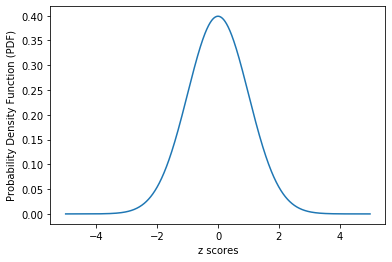

In [5]:
def univariate_gaussian_pdf(x, mean, variance):
    return (1. / np.sqrt(2*np.pi*variance) * 
            np.exp(- ((x - mean)**2 / 2.*variance)))

mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)
y = univariate_gaussian_pdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Probability Density Function (PDF)')
plt.show()


## Cumulative Distribution Function

Code Resource: https://github.com/rasbt/data-science-tutorial/blob/master/code/pdf_1.ipynb
The CDF determine the probability that an observation drawn from a distribution falls below a specified value. In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis.
This graph shows only a part of the graph. It looks like a s-shape.
Referenced: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-22.html

In [21]:
from scipy.integrate import quad


def gaussian_cdf_helper(t, mean, variance):
    return (1. / (np.sqrt(2.*np.pi*variance)) * 
                 np.exp(-(t - mean)**2 / (2.*variance)))


def gaussian_cdf(x, mean, variance):

    sd = 1
    mean =0
    out = []
    for val in x:
        integ = (quad(gaussian_cdf_helper, 
                      -np.inf, 
                      val, 
                      args=(mean, variance))[0])
        out.append(integ)
    return out

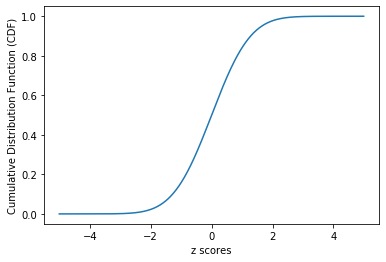

In [23]:
mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)

y = gaussian_cdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.show()

## Quantile or Inverse Function (CDF)

## Normal Distribution

mu = mean of the distribution 
sigma = standard deviation

In [14]:
mu = 0
sigma = 1
x_norm = np.arange(-5, 5, 0.1)
y_norm = stats.norm.pdf(x_norm, 0, 1)
print('mu = %.2f' % mu)
print('sigma = %.2f' % sigma)

mu = 0.00
sigma = 1.00


## T Distribution

Resource: http://pytolearn.csd.auth.gr/d1-hyptest/11/t-distro.html 
t.pdf(x, df) = gamma((df+1)/2)/(sqrt(pi*df) * gamma(df/2) * (1+x**2/df)**((df+1)/2))

In [15]:
from scipy.stats import t
# Freeze for df=4, loc=0, scale=1 and get the first four moments from stats()
rv = t(df=4, loc=0, scale=1)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(2.), array(0.), array(inf))

## Exploratory Data Analysis

## Normal Distribution

This plot shows a normal distribution and the shape is a bell-curve.

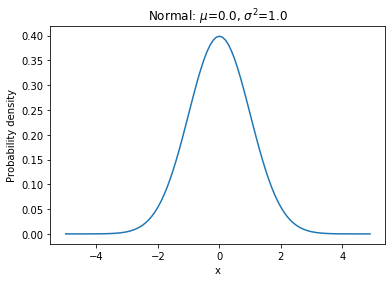

In [16]:
plt.plot(x_norm, y_norm)
plt.title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f' % (mu, sigma))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.show()

## T Distribution

These graphs are slightly similar, but as you can see at df = 4, the top of the bell curved is more blocked shaped. As the df goes up, it becomes smoother.

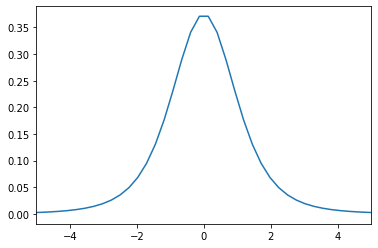

In [17]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline

rv = t(df=4, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plt.xlim(-5,5)
plt.plot(x,y)

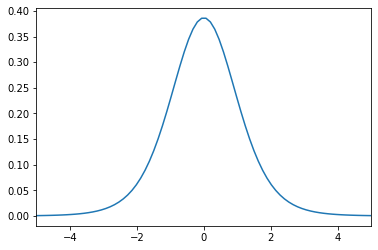

In [18]:
rv = t(df=8, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plt.xlim(-5,5)
plt.plot(x,y)

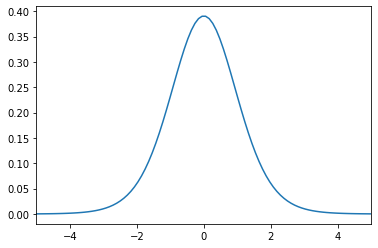

In [19]:
rv = t(df=12, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plt.xlim(-5,5)
plt.plot(x,y)

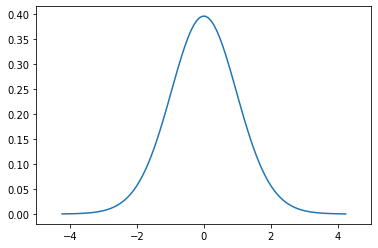

In [12]:
rv = t(df=30, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plt.xlim(-5,5)
plt.plot(x,y)

## Conclusions
Question 1: Given a probability of .025, what is the Z-score whose cumulative distribution matches the probability?


(np.sqrt(2.*np.pi*variance)) *  np.exp(-(t - mean)**2 / (2.*variance)) = 0.25
z score = 1.959964

Question 2: What is the probability that the Z-score is within two standard deviations of the mean?
Approximately 95% of the z-score will be within two standard deviations of the mean.